### Import Library

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder as le


In [66]:
df_fish = pd.read_csv('fish_data.csv')
df_fish

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31
...,...,...,...,...
4075,Sillaginopsis panijus,30.56,6.12,0.20
4076,Sillaginopsis panijus,29.66,6.11,0.21
4077,Sillaginopsis panijus,32.81,6.25,0.19
4078,Sillaginopsis panijus,29.78,6.11,0.21


### Data Check

In [67]:
print("Data Shape : ",df_fish.shape)


Data Shape :  (4080, 4)


In [68]:
df_fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB


In [69]:
df_fish.describe()

,length,weight,w_l_ratio
count,4080.000000,4080.000000,4080.000000
mean,17.353544,3.739875,0.252782
std,7.114684,1.040365,0.123046
min,6.360000,2.050000,0.080000
25%,11.327500,3.070000,0.170000
50%,17.350000,3.310000,0.190000
75%,22.585000,4.100000,0.340000
max,33.860000,6.290000,0.640000


In [70]:
df_fish.isnull().sum()

species      0
length       0
weight       0
w_l_ratio    0
dtype: int64

In [71]:
df_fish['species'].value_counts()

species
Setipinna taty            480
Anabas testudineus        476
Pethia conchonius         475
Otolithoides biauritus    468
Polynemus paradiseus      458
Sillaginopsis panijus     455
Otolithoides pama         435
Puntius lateristriga      418
Coilia dussumieri         415
Name: count, dtype: int64

In [72]:
encoder = le()
df_fish['species'] = encoder.fit_transform(df_fish['species'])
df_fish['species'].value_counts()

species
7    480
0    476
4    475
2    468
5    458
8    455
3    435
6    418
1    415
Name: count, dtype: int64

### Visualisasi

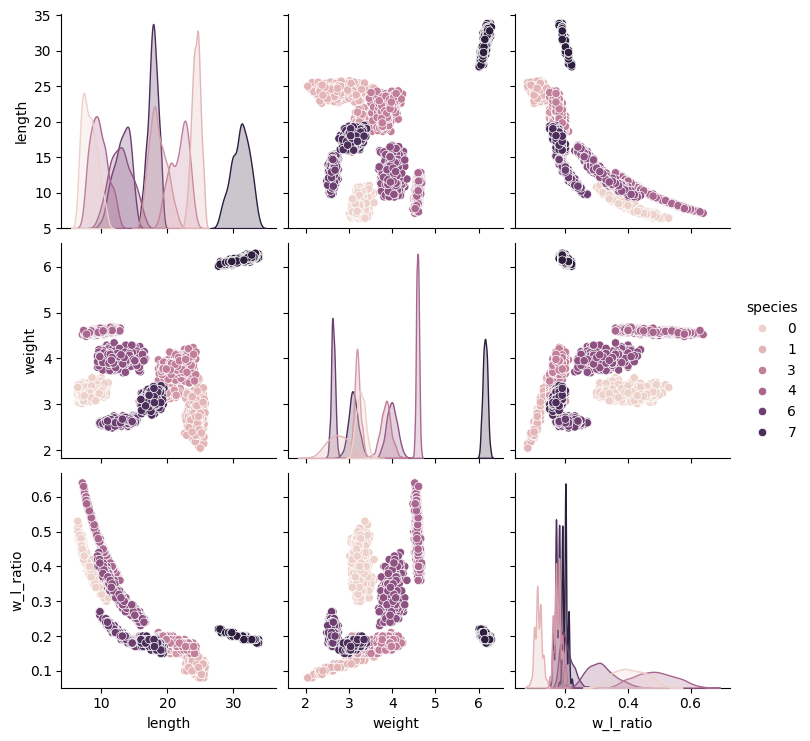

In [73]:
sb.pairplot(df_fish, hue='species')



Text(0.5, 1.0, 'Jumlah Masing-masing Jenis Ikan')

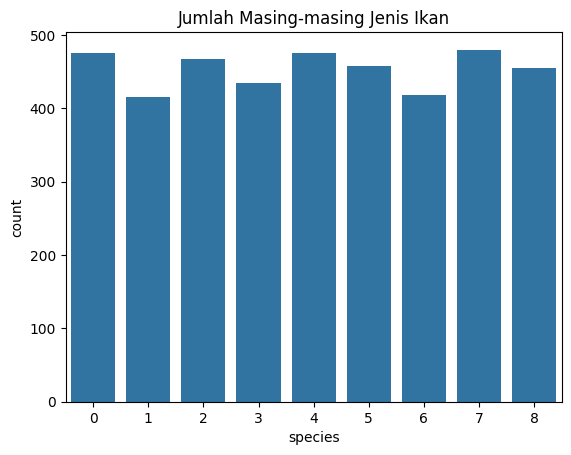

In [74]:
sb.countplot(data=df_fish, x='species').set_title('Jumlah Masing-masing Jenis Ikan')

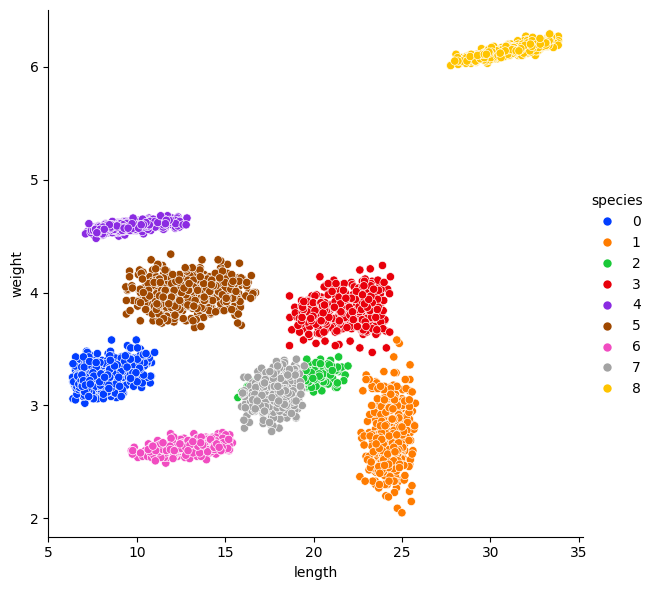

In [75]:
sb.relplot(data=df_fish, x='length', y='weight', hue='species', palette= 'bright', height=6)

In [76]:
df_fish.corr()

,species,length,weight,w_l_ratio
species,1.000000,0.342145,0.475682,-0.181628
length,0.342145,1.000000,0.411584,-0.738174
weight,0.475682,0.411584,1.000000,0.245835
w_l_ratio,-0.181628,-0.738174,0.245835,1.000000


<Axes: >

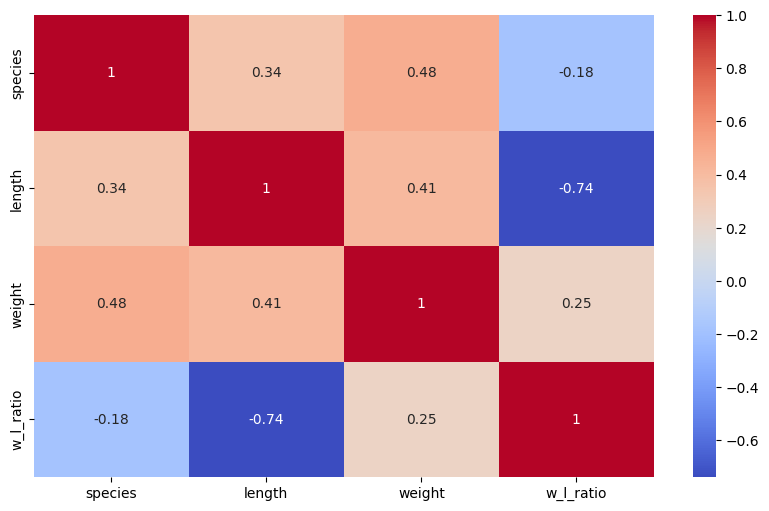

In [77]:
plt.figure(figsize=(10,6))
sb.heatmap(df_fish.corr(), annot=True, cmap='coolwarm')

### Train Test Split

In [78]:
x = df_fish.drop('species', axis=1)
y = df_fish['species']

In [79]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=0)

# 20% = 91.91%
# 25% = 91.96%
# 30% = 91.58%
# 35% = 92.30%

### Modeling,Evaluasi dan Prediksi

In [81]:
klasifikasi = SVC(kernel='linear')
klasifikasi.fit(x_train, y_train)

y_pred = klasifikasi.predict(x_test)
CLF = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))
print("Nilai Akurasi SVM : {:.2f}".format(CLF*100))

# linear = 92.30%
# rbf = 91.88%
# poly = 90.55%
# sigmoid = 74.79%


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       168
           1       1.00      0.99      1.00       161
           2       0.70      0.62      0.66       170
           3       0.99      0.99      0.99       157
           4       1.00      1.00      1.00       148
           5       1.00      1.00      1.00       150
           6       1.00      1.00      1.00       130
           7       0.65      0.73      0.69       163
           8       1.00      1.00      1.00       181

    accuracy                           0.92      1428
   macro avg       0.93      0.93      0.93      1428
weighted avg       0.92      0.92      0.92      1428

Nilai Akurasi SVM : 92.30


### Test Data dan Buat Model

In [85]:
new_data = {
    'length' : [40.4],
    'weight' : [5.35],
    'w_l_ratio' : [0.58]}

new_data = pd.DataFrame(new_data)
new_data

,length,weight,w_l_ratio
0,40.4,5.35,0.58


In [86]:
scaled_new_data = scaler.transform(new_data)
y_pred_new = klasifikasi.predict(scaled_new_data)

print("Ikan yang di prediksi termasuk jenis :",y_pred_new)

Ikan yang di prediksi termasuk jenis : [8]


In [84]:
pickle.dump(klasifikasi, open('SVM_fish.pkl', 'wb'))